In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [22]:
# reading the data
data = pd.read_csv('../datasets/FAO.csv', encoding = "ISO-8859-1")

# checking the shape of the data
print(data.shape)

(21477, 63)


In [23]:
data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [24]:
data['total'] = (data['Y1961'] + data['Y1962'] + data['Y1963'] + data['Y1964'] + data['Y1965'] + data['Y1966'] + 
    data['Y1967'] + data['Y1968'] + data['Y1969'] + data['Y1970'] + data['Y1971'] + data['Y1972'] + data['Y1973'] +
    data['Y1974'] + data['Y1975'] + data['Y1976'] + data['Y1977'] + data['Y1978'] + data['Y1979'] + data['Y1980'] + 
    data['Y1981'] + data['Y1982'] + data['Y1983'] + data['Y1984'] + data['Y1985'] + data['Y1986'] + data['Y1987'] + 
    data['Y1988'] + data['Y1989'] + data['Y1990'] + data['Y1991'] + data['Y1992'] + data['Y1993'] + data['Y1994'] + 
    data['Y1995'] + data['Y1996'] + data['Y1997'] + data['Y1998'] + data['Y1999'] + data['Y2000'] + data['Y2001'] + 
    data['Y2001'] + data['Y2002'] + data['Y2003'] + data['Y2004'] + data['Y2005'] + data['Y2006'] + data['Y2007'] + 
    data['Y2008'] + data['Y2009'] + data['Y2010'] + data['Y2011'] + data['Y2012'] + data['Y2013'] )

# Data Visualization

In [25]:
df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['total'].agg('mean')

trace = go.Choropleth(
    locationmode = 'country names',
    locations = df,
    text = df,
    colorscale = 'Earth',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Mean Production in Differet Parts of World')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

In [7]:
df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['Y1961'].agg('mean')

trace = go.Choropleth(
    locationmode = 'country names',
    locations = df,
    text = df,
    colorscale = 'Earth',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Mean Production in 1961 in Differet Parts of World')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

In [8]:
df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['Y2013'].agg('mean')

trace = go.Choropleth(
    locationmode = 'country names',
    locations = df,
    text = df,
    colorscale = 'Earth',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Mean Production in 2013 in Differet Parts of World')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

In [9]:
# delete the total column

data = data.drop(['total'], axis = 1)


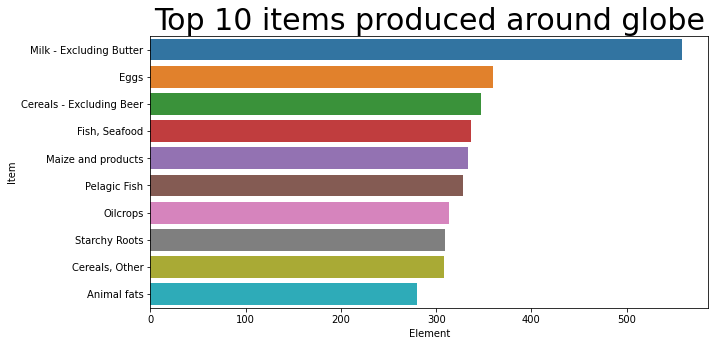

In [17]:
# Top Products around the globe

# setting the style to be ggplot

items = pd.DataFrame(data.groupby("Item")["Element"].agg("count").sort_values(ascending=False))[:10]

# plotting
plt.rcParams['figure.figsize'] = (10, 5)
#plt.gcf().subplots_adjust(left = .3)
sns.barplot(x = items.Element, y = items.index, data = items)
plt.gca().set_title("Top 10 items produced around globe", fontsize = 30)
plt.show()

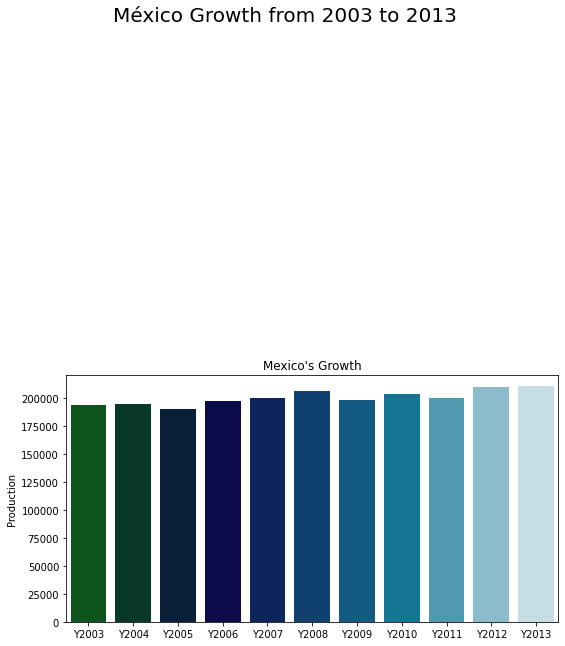

In [20]:
# setting the size of the plot
plt.rcParams['figure.figsize'] = (30, 10)

#looking at mexico's growth
mexico_production = pd.DataFrame(data[data['Area'] == 'Mexico'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

mexico_production.columns = ['Production']
plt.subplot(235)
sns.barplot(x = mexico_production.index, y = mexico_production.Production, data = mexico_production, palette = 'ocean')
plt.gca().set_title("Mexico's Growth")

plt.suptitle('México Growth from 2003 to 2013', fontsize = 20)
plt.show()

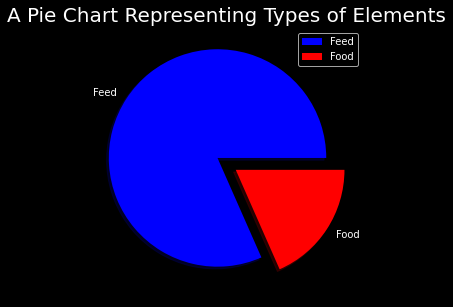

In [11]:
labels = ['Feed', 'Food']
size = data['Element'].value_counts()
colors = ['blue', 'red']
explode = [0.1, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A Pie Chart Representing Types of Elements', fontsize = 20)
plt.legend()
plt.show()

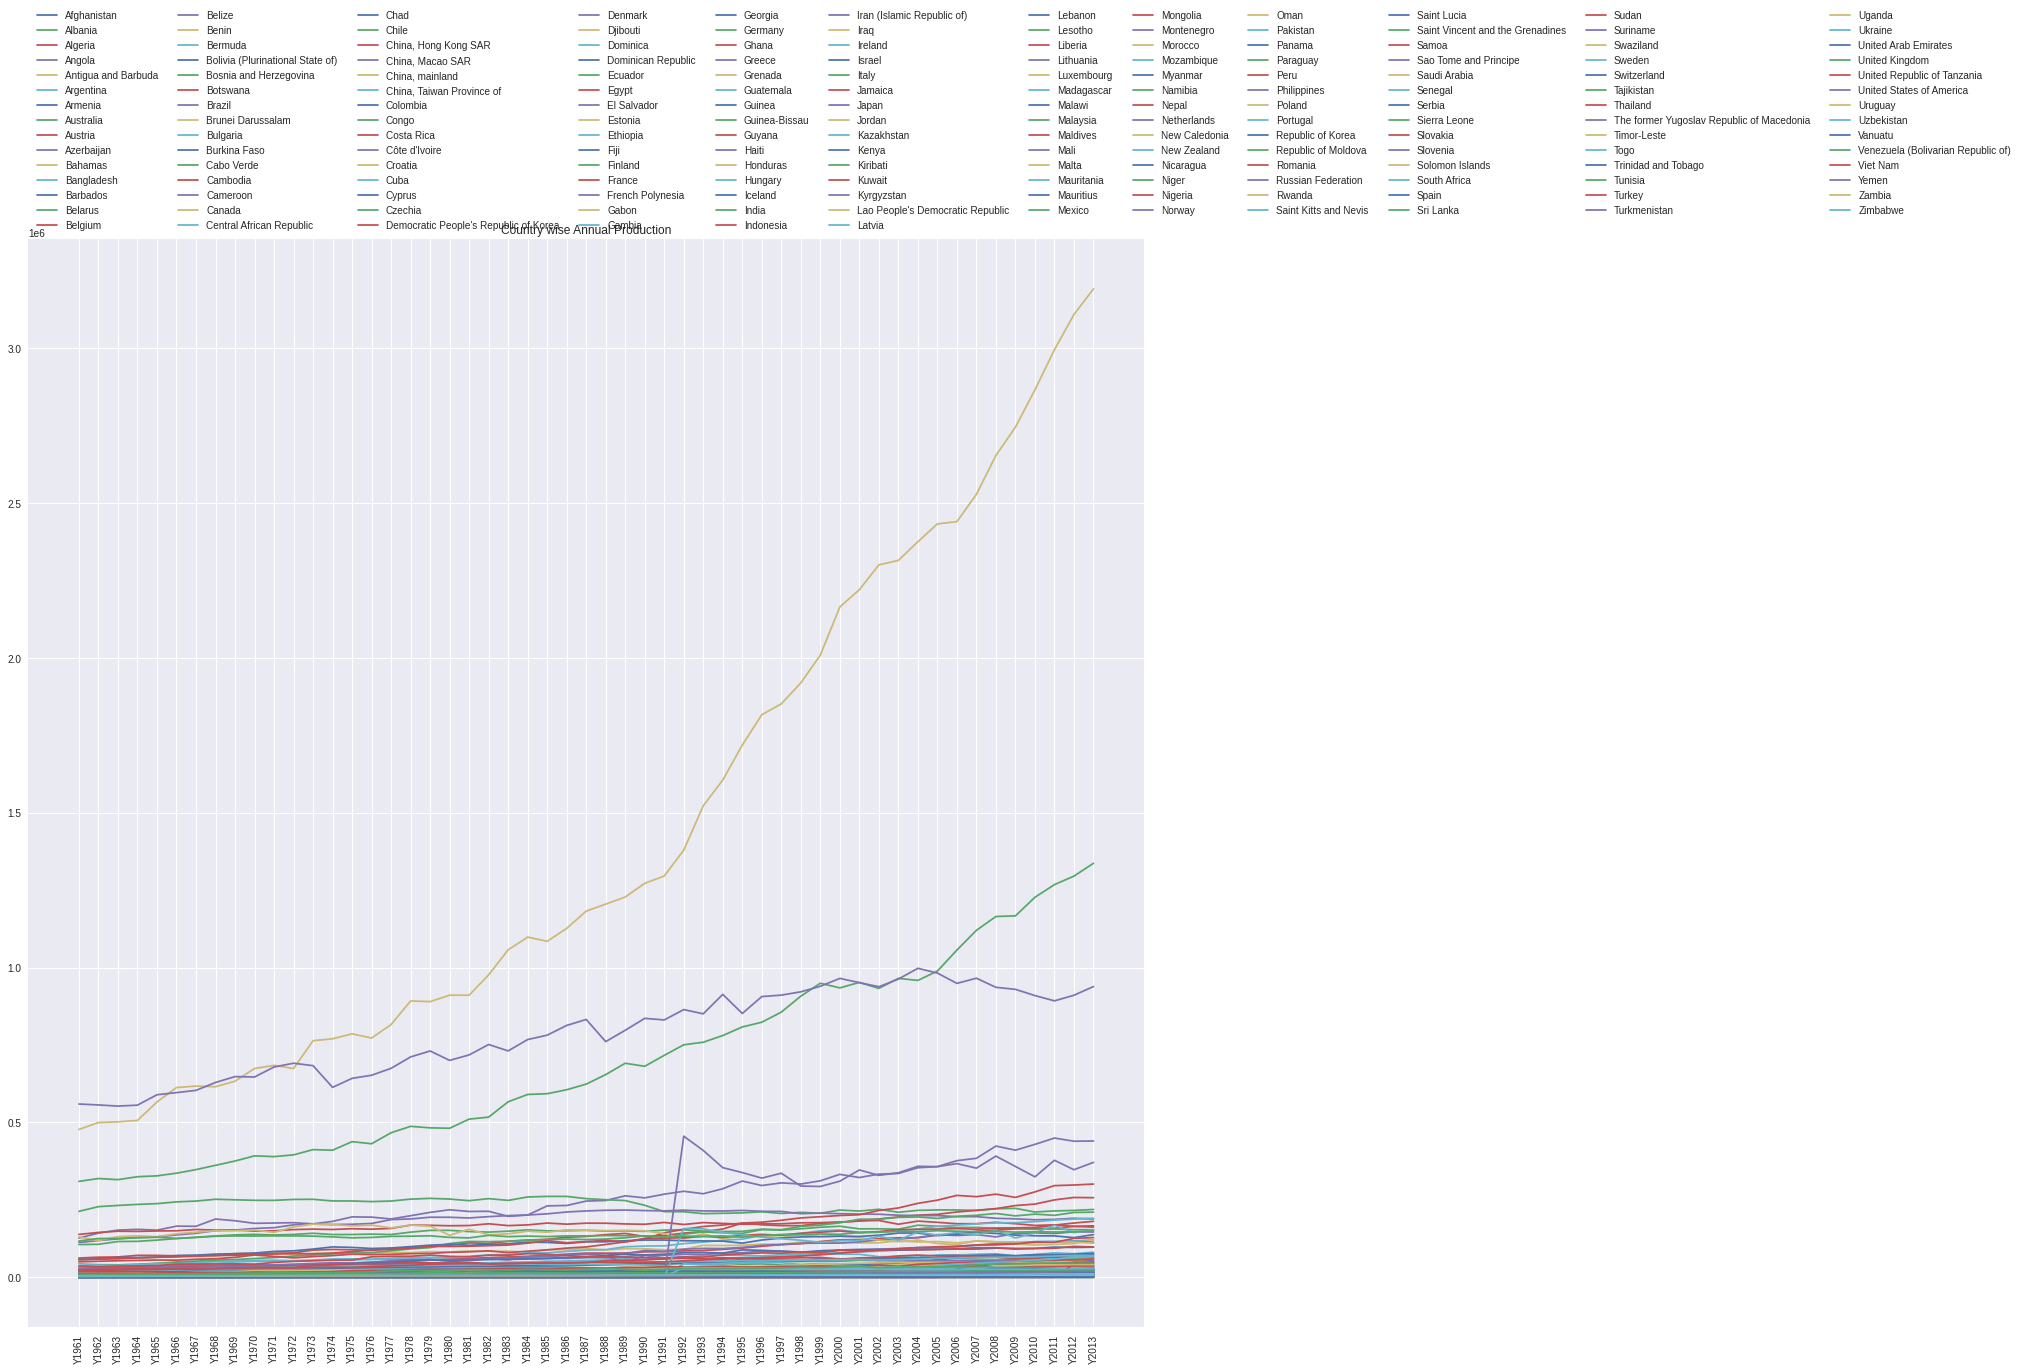

In [12]:
# plotting for the Annual Production of crops by every country

countries = list(data['Area'].unique())
years = list(data.iloc[:, 10:].columns)

plt.style.use('seaborn')    
plt.figure(figsize = (20, 20))
for i in countries:
    production = []
    for j in years:
        production.append(data[j][data['Area'] == i].sum())
    plt.plot(production, label = i)
    
plt.xticks(np.arange(53), tuple(years), rotation = 90)
plt.title('Country wise Annual Production')
plt.legend()
plt.legend(bbox_to_anchor = (0., 1, 1.5,  1.5), loc = 3, ncol = 12)
plt.savefig('countries_production.png')
plt.show()

In [13]:
# creating a new data containing information about countries and productions only

new_data_dict = {}
for i in countries:
    production = []
    for j in years:
        production.append(data[j][data['Area'] == i].sum())
    new_data_dict[i] = production
new_data = pd.DataFrame(new_data_dict)

new_data.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,9481.0,1706.0,7488.0,4834.0,92.0,43402.0,0.0,25795.0,22542.0,0.0,...,12367.0,559347.0,4631.0,0.0,97.0,9523.0,23856.0,2982.0,2976.0,3260.0
1,9414.0,1749.0,7235.0,4775.0,94.0,40784.0,0.0,27618.0,22627.0,0.0,...,12810.0,556319.0,4448.0,0.0,101.0,9369.0,25220.0,3038.0,3057.0,3503.0
2,9194.0,1767.0,6861.0,5240.0,105.0,40219.0,0.0,28902.0,23637.0,0.0,...,13109.0,552630.0,4682.0,0.0,103.0,9788.0,26053.0,3147.0,3069.0,3479.0
3,10170.0,1889.0,7255.0,5286.0,95.0,41638.0,0.0,29107.0,24099.0,0.0,...,12965.0,555677.0,4723.0,0.0,102.0,10539.0,26377.0,3224.0,3121.0,3738.0
4,10473.0,1884.0,7509.0,5527.0,84.0,44936.0,0.0,28961.0,22664.0,0.0,...,13742.0,589288.0,4581.0,0.0,107.0,10641.0,26961.0,3328.0,3236.0,3940.0


In [14]:
new_data['Year'] = np.linspace(1961, 2013, num = 53).astype('int')

# checking the shape of the new data
new_data.shape

(53, 175)

## Time Series Analysis for México

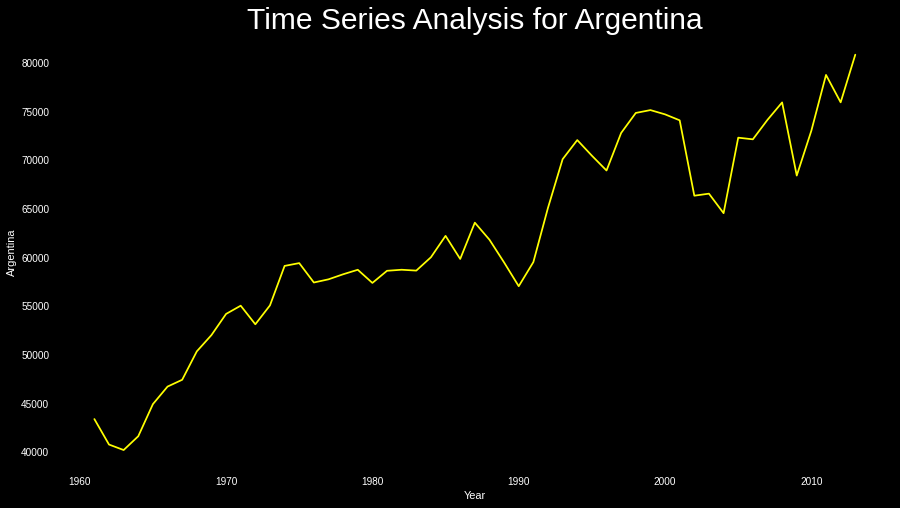

In [15]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Argentina'], color = 'yellow')
plt.title('Time Series Analysis for Argentina', fontsize = 30)
plt.grid()
plt.show()